## Emerging Technologies Project 2020
***


#### Required imports

In [1]:
# Neural networks.
import tensorflow.keras as kr
# Numerical arrays
import numpy as np
# Data frames.
import pandas as pd
# Plotting
import matplotlib.pyplot as plt

***
#### Set up plot

In [2]:
# Plot style.
plt.style.use("ggplot")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

***
#### Read data and split up columns

In [3]:
# Read power data from csv file into np array, ignore the string elements [1]
data = np.genfromtxt('./misc/powerproduction.csv', delimiter=",",skip_header=1)
# Define train
train = pd.DataFrame()
# Remove rows with values of zero [2]
refineddata = data[(data != 0).all(axis=1)]
# Add speed and power columns to train
train['speed'] = refineddata[:,0]
train['power'] = refineddata[:,1]
# Show refined data
train

,speed,power
0,0.325,4.331
1,0.400,5.186
2,0.450,3.826
3,0.501,1.048
4,0.526,5.553
...,...,...
446,24.249,103.700
447,24.299,93.694
448,24.349,93.078
449,24.374,98.223


***
#### Initialize model

In [4]:
# Create a neural network
model = kr.models.Sequential()

***
#### Testing with different single layer configurations

In [5]:
# Testing single layer networks

# Add a layer and compile
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Better than ones & zeros: random_normal - loss 230
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='random_normal', bias_initializer='random_normal'))

# Less acurate: glorot_uniform - 260
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

***
#### Add 3 layers to network

Here I am adding three layers of neurons to the network. Layers 1 and 2 have 3 neurons each of activation type Sigmoid. Layer 3 has one neuron of activation type Linear. By doing this I got the loss down from approximately 260 to 16.1256. The result of 260 loss was with a single layer which had only one neuron whose activation type was linear (tested in cell above). 

In [6]:
# 3 neurons, sigmoid, input 1
model.add(kr.layers.Dense(3, input_shape=(1,), activation="sigmoid", kernel_initializer='random_normal', 
                          bias_initializer='random_normal'))
# 3 neurons, sigmoid, input 3
model.add(kr.layers.Dense(3, input_shape=(3,), activation="sigmoid", kernel_initializer='random_normal', 
                          bias_initializer='random_normal'))
# 1 neurons, linear, input 3
model.add(kr.layers.Dense(1, input_shape=(3,), activation="linear", kernel_initializer='random_normal', 
                          bias_initializer='random_normal'))

***
#### Compile model

In [7]:
# Compile Network
model.compile('adam', loss='mean_squared_error') 

***
#### Train model 

Loading our refined csv data into the model. And setting the epochs to 3000, I show, from the comparison below that it is the most efficient in terms of accuracy vs running time. 

**Epoch number / loss correlation**<br>
1000 epoch loss is 793.1434<br>
2000 epoch loss is 66.3111<br>
3000 epoch loss is 16.1256<br>
4000 epoch loss is 15.6183<br>
*Note: These losses will vary slightly each time the note-book is run.*

In [8]:
# Train the neural network on our training data.
model.fit(train['speed'], train['power'], epochs=3000)

Epoch 1/3000
15/15 [==============================] - 1s 3ms/step - loss: 4690.6767
Epoch 2/3000
15/15 [==============================] - 0s 3ms/step - loss: 4159.4781
Epoch 3/3000
15/15 [==============================] - 0s 2ms/step - loss: 4405.0764
Epoch 4/3000
15/15 [==============================] - 0s 2ms/step - loss: 4449.2504
Epoch 5/3000
15/15 [==============================] - 0s 3ms/step - loss: 4363.0062
Epoch 6/3000
15/15 [==============================] - 0s 2ms/step - loss: 4297.0624
Epoch 7/3000
15/15 [==============================] - 0s 2ms/step - loss: 4678.9287
Epoch 8/3000
15/15 [==============================] - 0s 3ms/step - loss: 4589.7273
Epoch 9/3000
15/15 [==============================] - 0s 2ms/step - loss: 4563.9498
Epoch 10/3000
15/15 [==============================] - 0s 2ms/step - loss: 4734.2495
Epoch 11/3000
15/15 [==============================] - 0s 2ms/step - loss: 4218.8690
Epoch 12/3000
15/15 [==============================] - 0s 2ms/step - loss:

15/15 [==============================] - 0s 1ms/step - loss: 3926.3672
Epoch 97/3000
15/15 [==============================] - 0s 1ms/step - loss: 3774.0290
Epoch 98/3000
15/15 [==============================] - 0s 1ms/step - loss: 3883.2307
Epoch 99/3000
15/15 [==============================] - 0s 1ms/step - loss: 3815.4586
Epoch 100/3000
15/15 [==============================] - 0s 2ms/step - loss: 3919.6000
Epoch 101/3000
15/15 [==============================] - 0s 2ms/step - loss: 3752.3851
Epoch 102/3000
15/15 [==============================] - 0s 2ms/step - loss: 4026.7938
Epoch 103/3000
15/15 [==============================] - 0s 2ms/step - loss: 3944.2373
Epoch 104/3000
15/15 [==============================] - 0s 1ms/step - loss: 3892.8595
Epoch 105/3000
15/15 [==============================] - 0s 2ms/step - loss: 3826.6529
Epoch 106/3000
15/15 [==============================] - 0s 1ms/step - loss: 3381.9629
Epoch 107/3000
15/15 [==============================] - 0s 1ms/step - lo

15/15 [==============================] - 0s 2ms/step - loss: 3433.5060
Epoch 192/3000
15/15 [==============================] - 0s 2ms/step - loss: 3453.9245
Epoch 193/3000
15/15 [==============================] - 0s 2ms/step - loss: 3453.5801
Epoch 194/3000
15/15 [==============================] - 0s 1ms/step - loss: 3425.7892
Epoch 195/3000
15/15 [==============================] - 0s 1ms/step - loss: 3343.6460
Epoch 196/3000
15/15 [==============================] - 0s 2ms/step - loss: 3342.2571
Epoch 197/3000
15/15 [==============================] - 0s 2ms/step - loss: 3343.1212
Epoch 198/3000
15/15 [==============================] - 0s 2ms/step - loss: 3350.7549
Epoch 199/3000
15/15 [==============================] - 0s 2ms/step - loss: 3211.5383
Epoch 200/3000
15/15 [==============================] - 0s 2ms/step - loss: 3804.1617
Epoch 201/3000
15/15 [==============================] - 0s 1ms/step - loss: 3328.3342
Epoch 202/3000
15/15 [==============================] - 0s 1ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 3014.7703
Epoch 286/3000
15/15 [==============================] - 0s 2ms/step - loss: 3209.0222
Epoch 287/3000
15/15 [==============================] - 0s 1ms/step - loss: 2843.8222
Epoch 288/3000
15/15 [==============================] - 0s 2ms/step - loss: 2916.9956
Epoch 289/3000
15/15 [==============================] - 0s 1ms/step - loss: 3034.5363
Epoch 290/3000
15/15 [==============================] - 0s 2ms/step - loss: 3145.5672
Epoch 291/3000
15/15 [==============================] - 0s 2ms/step - loss: 2756.8464
Epoch 292/3000
15/15 [==============================] - 0s 2ms/step - loss: 3014.6105
Epoch 293/3000
15/15 [==============================] - 0s 2ms/step - loss: 3094.1135
Epoch 294/3000
15/15 [==============================] - 0s 1ms/step - loss: 2936.6731
Epoch 295/3000
15/15 [==============================] - 0s 2ms/step - loss: 2819.1307
Epoch 296/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 2502.3168
Epoch 381/3000
15/15 [==============================] - 0s 3ms/step - loss: 2678.2471
Epoch 382/3000
15/15 [==============================] - 0s 2ms/step - loss: 2493.9465
Epoch 383/3000
15/15 [==============================] - 0s 2ms/step - loss: 2634.6486
Epoch 384/3000
15/15 [==============================] - 0s 2ms/step - loss: 2548.6839
Epoch 385/3000
15/15 [==============================] - 0s 2ms/step - loss: 2467.3605
Epoch 386/3000
15/15 [==============================] - 0s 2ms/step - loss: 2593.0397
Epoch 387/3000
15/15 [==============================] - 0s 1ms/step - loss: 2611.4486
Epoch 388/3000
15/15 [==============================] - 0s 2ms/step - loss: 2538.3922
Epoch 389/3000
15/15 [==============================] - 0s 2ms/step - loss: 2590.1189
Epoch 390/3000
15/15 [==============================] - 0s 2ms/step - loss: 2541.9710
Epoch 391/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 2108.2645
Epoch 476/3000
15/15 [==============================] - 0s 2ms/step - loss: 2212.6039
Epoch 477/3000
15/15 [==============================] - 0s 2ms/step - loss: 2215.8258
Epoch 478/3000
15/15 [==============================] - 0s 2ms/step - loss: 2193.7572
Epoch 479/3000
15/15 [==============================] - 0s 2ms/step - loss: 2022.3742
Epoch 480/3000
15/15 [==============================] - 0s 2ms/step - loss: 2208.7403
Epoch 481/3000
15/15 [==============================] - 0s 2ms/step - loss: 2016.4640
Epoch 482/3000
15/15 [==============================] - 0s 2ms/step - loss: 2198.0108
Epoch 483/3000
15/15 [==============================] - 0s 3ms/step - loss: 2165.3401
Epoch 484/3000
15/15 [==============================] - 0s 3ms/step - loss: 2109.0092
Epoch 485/3000
15/15 [==============================] - 0s 3ms/step - loss: 2079.5567
Epoch 486/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1843.9595
Epoch 570/3000
15/15 [==============================] - 0s 2ms/step - loss: 1853.8562
Epoch 571/3000
15/15 [==============================] - 0s 2ms/step - loss: 1846.3114
Epoch 572/3000
15/15 [==============================] - 0s 2ms/step - loss: 1755.4666
Epoch 573/3000
15/15 [==============================] - 0s 2ms/step - loss: 1708.0797
Epoch 574/3000
15/15 [==============================] - 0s 1ms/step - loss: 1862.2725
Epoch 575/3000
15/15 [==============================] - 0s 1ms/step - loss: 1719.1038
Epoch 576/3000
15/15 [==============================] - 0s 3ms/step - loss: 1765.5609
Epoch 577/3000
15/15 [==============================] - 0s 2ms/step - loss: 1846.7971
Epoch 578/3000
15/15 [==============================] - 0s 2ms/step - loss: 1675.9507
Epoch 579/3000
15/15 [==============================] - 0s 2ms/step - loss: 1876.1816
Epoch 580/3000
15/15 [==============================] - 0s 1ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1542.0984
Epoch 664/3000
15/15 [==============================] - 0s 2ms/step - loss: 1522.8207
Epoch 665/3000
15/15 [==============================] - 0s 1ms/step - loss: 1550.2854
Epoch 666/3000
15/15 [==============================] - 0s 2ms/step - loss: 1507.7730
Epoch 667/3000
15/15 [==============================] - 0s 2ms/step - loss: 1611.2069
Epoch 668/3000
15/15 [==============================] - 0s 2ms/step - loss: 1572.0170
Epoch 669/3000
15/15 [==============================] - 0s 2ms/step - loss: 1394.6507
Epoch 670/3000
15/15 [==============================] - 0s 2ms/step - loss: 1514.9929
Epoch 671/3000
15/15 [==============================] - 0s 2ms/step - loss: 1527.5384
Epoch 672/3000
15/15 [==============================] - 0s 3ms/step - loss: 1565.6821
Epoch 673/3000
15/15 [==============================] - 0s 3ms/step - loss: 1548.8172
Epoch 674/3000
15/15 [==============================] - 0s 3ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 1292.7771
Epoch 759/3000
15/15 [==============================] - 0s 2ms/step - loss: 1302.0287
Epoch 760/3000
15/15 [==============================] - 0s 2ms/step - loss: 1304.6330
Epoch 761/3000
15/15 [==============================] - 0s 2ms/step - loss: 1339.1623
Epoch 762/3000
15/15 [==============================] - 0s 1ms/step - loss: 1245.2439
Epoch 763/3000
15/15 [==============================] - 0s 1ms/step - loss: 1145.5832
Epoch 764/3000
15/15 [==============================] - 0s 2ms/step - loss: 1216.2104
Epoch 765/3000
15/15 [==============================] - 0s 2ms/step - loss: 1228.0633
Epoch 766/3000
15/15 [==============================] - 0s 2ms/step - loss: 1355.4486
Epoch 767/3000
15/15 [==============================] - 0s 3ms/step - loss: 1197.4204
Epoch 768/3000
15/15 [==============================] - 0s 2ms/step - loss: 1332.7079
Epoch 769/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 952.2905
Epoch 854/3000
15/15 [==============================] - 0s 1ms/step - loss: 1013.9190
Epoch 855/3000
15/15 [==============================] - 0s 1ms/step - loss: 1058.8632
Epoch 856/3000
15/15 [==============================] - 0s 1ms/step - loss: 1059.1404
Epoch 857/3000
15/15 [==============================] - 0s 2ms/step - loss: 916.5385
Epoch 858/3000
15/15 [==============================] - 0s 1ms/step - loss: 996.6996
Epoch 859/3000
15/15 [==============================] - 0s 1ms/step - loss: 1052.4941
Epoch 860/3000
15/15 [==============================] - 0s 2ms/step - loss: 1038.2721
Epoch 861/3000
15/15 [==============================] - 0s 2ms/step - loss: 986.1694
Epoch 862/3000
15/15 [==============================] - 0s 2ms/step - loss: 1009.2844
Epoch 863/3000
15/15 [==============================] - 0s 2ms/step - loss: 1016.0023
Epoch 864/3000
15/15 [==============================] - 0s 1ms/step - los

15/15 [==============================] - 0s 2ms/step - loss: 835.7815
Epoch 950/3000
15/15 [==============================] - 0s 2ms/step - loss: 799.0563
Epoch 951/3000
15/15 [==============================] - 0s 2ms/step - loss: 873.1342
Epoch 952/3000
15/15 [==============================] - 0s 2ms/step - loss: 813.7660
Epoch 953/3000
15/15 [==============================] - 0s 2ms/step - loss: 864.3134
Epoch 954/3000
15/15 [==============================] - 0s 2ms/step - loss: 850.7543
Epoch 955/3000
15/15 [==============================] - 0s 3ms/step - loss: 864.0665
Epoch 956/3000
15/15 [==============================] - 0s 2ms/step - loss: 837.1849
Epoch 957/3000
15/15 [==============================] - 0s 2ms/step - loss: 777.8111
Epoch 958/3000
15/15 [==============================] - 0s 1ms/step - loss: 796.5261
Epoch 959/3000
15/15 [==============================] - 0s 1ms/step - loss: 786.7337
Epoch 960/3000
15/15 [==============================] - 0s 1ms/step - loss: 783.

15/15 [==============================] - 0s 2ms/step - loss: 703.6494
Epoch 1046/3000
15/15 [==============================] - 0s 2ms/step - loss: 683.2806
Epoch 1047/3000
15/15 [==============================] - 0s 2ms/step - loss: 692.4824
Epoch 1048/3000
15/15 [==============================] - 0s 2ms/step - loss: 646.1786
Epoch 1049/3000
15/15 [==============================] - 0s 2ms/step - loss: 654.1397
Epoch 1050/3000
15/15 [==============================] - 0s 3ms/step - loss: 675.3500
Epoch 1051/3000
15/15 [==============================] - 0s 2ms/step - loss: 669.1093
Epoch 1052/3000
15/15 [==============================] - 0s 2ms/step - loss: 631.8047
Epoch 1053/3000
15/15 [==============================] - 0s 1ms/step - loss: 661.5232
Epoch 1054/3000
15/15 [==============================] - 0s 2ms/step - loss: 715.7288
Epoch 1055/3000
15/15 [==============================] - 0s 3ms/step - loss: 640.5042
Epoch 1056/3000
15/15 [==============================] - 0s 3ms/step -

15/15 [==============================] - 0s 3ms/step - loss: 527.6540
Epoch 1141/3000
15/15 [==============================] - 0s 3ms/step - loss: 506.3620
Epoch 1142/3000
15/15 [==============================] - 0s 3ms/step - loss: 581.3185
Epoch 1143/3000
15/15 [==============================] - 0s 2ms/step - loss: 528.6193
Epoch 1144/3000
15/15 [==============================] - 0s 3ms/step - loss: 527.6919
Epoch 1145/3000
15/15 [==============================] - 0s 2ms/step - loss: 552.9703
Epoch 1146/3000
15/15 [==============================] - 0s 2ms/step - loss: 506.0640
Epoch 1147/3000
15/15 [==============================] - 0s 2ms/step - loss: 499.0221
Epoch 1148/3000
15/15 [==============================] - 0s 1ms/step - loss: 508.9015
Epoch 1149/3000
15/15 [==============================] - 0s 2ms/step - loss: 537.4321
Epoch 1150/3000
15/15 [==============================] - 0s 2ms/step - loss: 534.1385
Epoch 1151/3000
15/15 [==============================] - 0s 1ms/step -

Epoch 1235/3000
15/15 [==============================] - 0s 3ms/step - loss: 396.4188
Epoch 1236/3000
15/15 [==============================] - 0s 2ms/step - loss: 409.0338
Epoch 1237/3000
15/15 [==============================] - 0s 2ms/step - loss: 400.4342
Epoch 1238/3000
15/15 [==============================] - 0s 2ms/step - loss: 426.3049
Epoch 1239/3000
15/15 [==============================] - 0s 2ms/step - loss: 400.5061
Epoch 1240/3000
15/15 [==============================] - 0s 2ms/step - loss: 426.8838
Epoch 1241/3000
15/15 [==============================] - 0s 3ms/step - loss: 408.3254
Epoch 1242/3000
15/15 [==============================] - 0s 2ms/step - loss: 378.7030
Epoch 1243/3000
15/15 [==============================] - 0s 2ms/step - loss: 402.9102
Epoch 1244/3000
15/15 [==============================] - 0s 3ms/step - loss: 388.5270
Epoch 1245/3000
15/15 [==============================] - 0s 2ms/step - loss: 393.5877
Epoch 1246/3000
15/15 [==============================]

15/15 [==============================] - 0s 2ms/step - loss: 294.2092
Epoch 1331/3000
15/15 [==============================] - 0s 2ms/step - loss: 306.1128
Epoch 1332/3000
15/15 [==============================] - 0s 2ms/step - loss: 339.4917
Epoch 1333/3000
15/15 [==============================] - 0s 2ms/step - loss: 302.0750
Epoch 1334/3000
15/15 [==============================] - 0s 2ms/step - loss: 318.8337
Epoch 1335/3000
15/15 [==============================] - 0s 2ms/step - loss: 313.9774
Epoch 1336/3000
15/15 [==============================] - 0s 1ms/step - loss: 321.1443
Epoch 1337/3000
15/15 [==============================] - 0s 1ms/step - loss: 304.9921
Epoch 1338/3000
15/15 [==============================] - 0s 2ms/step - loss: 304.4744
Epoch 1339/3000
15/15 [==============================] - 0s 2ms/step - loss: 298.1459
Epoch 1340/3000
15/15 [==============================] - 0s 1ms/step - loss: 295.4995
Epoch 1341/3000
15/15 [==============================] - 0s 1ms/step -

15/15 [==============================] - 0s 3ms/step - loss: 247.9570
Epoch 1426/3000
15/15 [==============================] - 0s 2ms/step - loss: 222.1872
Epoch 1427/3000
15/15 [==============================] - 0s 2ms/step - loss: 255.2415
Epoch 1428/3000
15/15 [==============================] - 0s 3ms/step - loss: 251.9127
Epoch 1429/3000
15/15 [==============================] - 0s 2ms/step - loss: 237.4266
Epoch 1430/3000
15/15 [==============================] - 0s 3ms/step - loss: 253.0086
Epoch 1431/3000
15/15 [==============================] - 0s 2ms/step - loss: 232.1004
Epoch 1432/3000
15/15 [==============================] - 0s 2ms/step - loss: 241.5257
Epoch 1433/3000
15/15 [==============================] - 0s 3ms/step - loss: 236.2647
Epoch 1434/3000
15/15 [==============================] - 0s 2ms/step - loss: 233.9716
Epoch 1435/3000
15/15 [==============================] - 0s 2ms/step - loss: 238.9157
Epoch 1436/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 1ms/step - loss: 184.2842
Epoch 1521/3000
15/15 [==============================] - 0s 2ms/step - loss: 175.8151
Epoch 1522/3000
15/15 [==============================] - 0s 2ms/step - loss: 190.8763
Epoch 1523/3000
15/15 [==============================] - 0s 2ms/step - loss: 183.0063
Epoch 1524/3000
15/15 [==============================] - 0s 2ms/step - loss: 181.6018
Epoch 1525/3000
15/15 [==============================] - 0s 2ms/step - loss: 184.8104
Epoch 1526/3000
15/15 [==============================] - 0s 2ms/step - loss: 184.9658
Epoch 1527/3000
15/15 [==============================] - 0s 1ms/step - loss: 183.4005
Epoch 1528/3000
15/15 [==============================] - 0s 2ms/step - loss: 182.0681
Epoch 1529/3000
15/15 [==============================] - 0s 2ms/step - loss: 187.9001
Epoch 1530/3000
15/15 [==============================] - 0s 2ms/step - loss: 184.6997
Epoch 1531/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 3ms/step - loss: 147.8069
Epoch 1615/3000
15/15 [==============================] - 0s 2ms/step - loss: 150.9708
Epoch 1616/3000
15/15 [==============================] - 0s 2ms/step - loss: 140.5578
Epoch 1617/3000
15/15 [==============================] - 0s 3ms/step - loss: 139.1937
Epoch 1618/3000
15/15 [==============================] - 0s 2ms/step - loss: 154.3902
Epoch 1619/3000
15/15 [==============================] - 0s 2ms/step - loss: 150.5141
Epoch 1620/3000
15/15 [==============================] - 0s 2ms/step - loss: 143.4448
Epoch 1621/3000
15/15 [==============================] - 0s 2ms/step - loss: 140.5752
Epoch 1622/3000
15/15 [==============================] - 0s 3ms/step - loss: 141.1795
Epoch 1623/3000
15/15 [==============================] - 0s 2ms/step - loss: 144.5327
Epoch 1624/3000
15/15 [==============================] - 0s 2ms/step - loss: 144.1356
Epoch 1625/3000
15/15 [==============================] - 0s 1ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 120.1003
Epoch 1709/3000
15/15 [==============================] - 0s 2ms/step - loss: 129.4022
Epoch 1710/3000
15/15 [==============================] - 0s 3ms/step - loss: 119.0766
Epoch 1711/3000
15/15 [==============================] - 0s 3ms/step - loss: 119.4844
Epoch 1712/3000
15/15 [==============================] - 0s 2ms/step - loss: 118.1139
Epoch 1713/3000
15/15 [==============================] - 0s 2ms/step - loss: 120.2116
Epoch 1714/3000
15/15 [==============================] - 0s 2ms/step - loss: 123.7348
Epoch 1715/3000
15/15 [==============================] - 0s 2ms/step - loss: 119.5161
Epoch 1716/3000
15/15 [==============================] - 0s 2ms/step - loss: 118.4840
Epoch 1717/3000
15/15 [==============================] - 0s 2ms/step - loss: 126.8750
Epoch 1718/3000
15/15 [==============================] - 0s 2ms/step - loss: 124.2361
Epoch 1719/3000
15/15 [==============================] - 0s 2ms/step -

15/15 [==============================] - 0s 3ms/step - loss: 100.3045
Epoch 1804/3000
15/15 [==============================] - 0s 3ms/step - loss: 96.6637
Epoch 1805/3000
15/15 [==============================] - 0s 3ms/step - loss: 99.0246
Epoch 1806/3000
15/15 [==============================] - 0s 3ms/step - loss: 109.5593
Epoch 1807/3000
15/15 [==============================] - 0s 2ms/step - loss: 102.0288
Epoch 1808/3000
15/15 [==============================] - 0s 3ms/step - loss: 96.0095
Epoch 1809/3000
15/15 [==============================] - 0s 2ms/step - loss: 103.6776
Epoch 1810/3000
15/15 [==============================] - 0s 2ms/step - loss: 97.1626
Epoch 1811/3000
15/15 [==============================] - 0s 2ms/step - loss: 96.0334
Epoch 1812/3000
15/15 [==============================] - 0s 2ms/step - loss: 102.4551
Epoch 1813/3000
15/15 [==============================] - 0s 3ms/step - loss: 88.7208
Epoch 1814/3000
15/15 [==============================] - 0s 3ms/step - loss:

15/15 [==============================] - 0s 3ms/step - loss: 75.7333
Epoch 1900/3000
15/15 [==============================] - 0s 3ms/step - loss: 86.1721
Epoch 1901/3000
15/15 [==============================] - 0s 3ms/step - loss: 79.8865
Epoch 1902/3000
15/15 [==============================] - 0s 3ms/step - loss: 75.8414
Epoch 1903/3000
15/15 [==============================] - 0s 3ms/step - loss: 75.5216
Epoch 1904/3000
15/15 [==============================] - 0s 2ms/step - loss: 80.9317
Epoch 1905/3000
15/15 [==============================] - 0s 2ms/step - loss: 82.0652
Epoch 1906/3000
15/15 [==============================] - 0s 3ms/step - loss: 83.7208
Epoch 1907/3000
15/15 [==============================] - 0s 3ms/step - loss: 74.8295
Epoch 1908/3000
15/15 [==============================] - 0s 2ms/step - loss: 72.4479
Epoch 1909/3000
15/15 [==============================] - 0s 2ms/step - loss: 76.3402
Epoch 1910/3000
15/15 [==============================] - 0s 3ms/step - loss: 80.7

15/15 [==============================] - 0s 1ms/step - loss: 65.1945
Epoch 1996/3000
15/15 [==============================] - 0s 2ms/step - loss: 63.5142
Epoch 1997/3000
15/15 [==============================] - 0s 2ms/step - loss: 64.3489
Epoch 1998/3000
15/15 [==============================] - 0s 1ms/step - loss: 63.7071
Epoch 1999/3000
15/15 [==============================] - 0s 2ms/step - loss: 61.5435
Epoch 2000/3000
15/15 [==============================] - 0s 1ms/step - loss: 70.5806
Epoch 2001/3000
15/15 [==============================] - 0s 2ms/step - loss: 64.1564
Epoch 2002/3000
15/15 [==============================] - 0s 2ms/step - loss: 71.0435
Epoch 2003/3000
15/15 [==============================] - 0s 2ms/step - loss: 69.1741
Epoch 2004/3000
15/15 [==============================] - 0s 2ms/step - loss: 68.0488
Epoch 2005/3000
15/15 [==============================] - 0s 2ms/step - loss: 68.8620
Epoch 2006/3000
15/15 [==============================] - 0s 2ms/step - loss: 65.4

15/15 [==============================] - 0s 3ms/step - loss: 53.1280
Epoch 2092/3000
15/15 [==============================] - 0s 2ms/step - loss: 51.1481
Epoch 2093/3000
15/15 [==============================] - 0s 3ms/step - loss: 52.0789
Epoch 2094/3000
15/15 [==============================] - 0s 2ms/step - loss: 51.0599
Epoch 2095/3000
15/15 [==============================] - 0s 3ms/step - loss: 49.8543
Epoch 2096/3000
15/15 [==============================] - 0s 2ms/step - loss: 54.9818
Epoch 2097/3000
15/15 [==============================] - 0s 2ms/step - loss: 55.2967
Epoch 2098/3000
15/15 [==============================] - 0s 2ms/step - loss: 55.9173
Epoch 2099/3000
15/15 [==============================] - 0s 3ms/step - loss: 51.4405
Epoch 2100/3000
15/15 [==============================] - 0s 2ms/step - loss: 54.7798
Epoch 2101/3000
15/15 [==============================] - 0s 3ms/step - loss: 55.8230
Epoch 2102/3000
15/15 [==============================] - 0s 3ms/step - loss: 51.0

15/15 [==============================] - 0s 2ms/step - loss: 44.3439
Epoch 2188/3000
15/15 [==============================] - 0s 2ms/step - loss: 43.4616
Epoch 2189/3000
15/15 [==============================] - 0s 1ms/step - loss: 43.6591
Epoch 2190/3000
15/15 [==============================] - 0s 2ms/step - loss: 41.7742
Epoch 2191/3000
15/15 [==============================] - 0s 2ms/step - loss: 46.0128
Epoch 2192/3000
15/15 [==============================] - 0s 3ms/step - loss: 42.9847
Epoch 2193/3000
15/15 [==============================] - 0s 2ms/step - loss: 44.7813
Epoch 2194/3000
15/15 [==============================] - 0s 2ms/step - loss: 46.0521
Epoch 2195/3000
15/15 [==============================] - 0s 3ms/step - loss: 43.5262
Epoch 2196/3000
15/15 [==============================] - 0s 2ms/step - loss: 42.7319
Epoch 2197/3000
15/15 [==============================] - 0s 2ms/step - loss: 44.6217
Epoch 2198/3000
15/15 [==============================] - 0s 3ms/step - loss: 41.5

15/15 [==============================] - 0s 2ms/step - loss: 37.0876
Epoch 2284/3000
15/15 [==============================] - 0s 3ms/step - loss: 40.0596
Epoch 2285/3000
15/15 [==============================] - 0s 2ms/step - loss: 38.9035
Epoch 2286/3000
15/15 [==============================] - 0s 3ms/step - loss: 38.0457
Epoch 2287/3000
15/15 [==============================] - 0s 2ms/step - loss: 35.4614
Epoch 2288/3000
15/15 [==============================] - 0s 2ms/step - loss: 36.1514
Epoch 2289/3000
15/15 [==============================] - 0s 3ms/step - loss: 37.5206
Epoch 2290/3000
15/15 [==============================] - 0s 2ms/step - loss: 35.7289
Epoch 2291/3000
15/15 [==============================] - 0s 2ms/step - loss: 35.8122
Epoch 2292/3000
15/15 [==============================] - 0s 2ms/step - loss: 38.1054
Epoch 2293/3000
15/15 [==============================] - 0s 3ms/step - loss: 37.6774
Epoch 2294/3000
15/15 [==============================] - 0s 2ms/step - loss: 34.9

15/15 [==============================] - 0s 3ms/step - loss: 30.5408
Epoch 2380/3000
15/15 [==============================] - 0s 2ms/step - loss: 32.6588
Epoch 2381/3000
15/15 [==============================] - 0s 3ms/step - loss: 31.2339
Epoch 2382/3000
15/15 [==============================] - 0s 2ms/step - loss: 30.4383
Epoch 2383/3000
15/15 [==============================] - 0s 3ms/step - loss: 31.7782
Epoch 2384/3000
15/15 [==============================] - 0s 2ms/step - loss: 29.4122
Epoch 2385/3000
15/15 [==============================] - 0s 1ms/step - loss: 31.9286
Epoch 2386/3000
15/15 [==============================] - 0s 2ms/step - loss: 32.4193
Epoch 2387/3000
15/15 [==============================] - 0s 1ms/step - loss: 30.9305
Epoch 2388/3000
15/15 [==============================] - 0s 2ms/step - loss: 30.9370
Epoch 2389/3000
15/15 [==============================] - 0s 3ms/step - loss: 31.1452
Epoch 2390/3000
15/15 [==============================] - 0s 2ms/step - loss: 32.5

15/15 [==============================] - 0s 2ms/step - loss: 26.2147
Epoch 2476/3000
15/15 [==============================] - 0s 1ms/step - loss: 27.6209
Epoch 2477/3000
15/15 [==============================] - 0s 1ms/step - loss: 26.1577
Epoch 2478/3000
15/15 [==============================] - 0s 2ms/step - loss: 27.7323
Epoch 2479/3000
15/15 [==============================] - 0s 1ms/step - loss: 29.2077
Epoch 2480/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.3192
Epoch 2481/3000
15/15 [==============================] - 0s 2ms/step - loss: 25.1744
Epoch 2482/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.5375
Epoch 2483/3000
15/15 [==============================] - 0s 2ms/step - loss: 26.5370
Epoch 2484/3000
15/15 [==============================] - 0s 2ms/step - loss: 27.4520
Epoch 2485/3000
15/15 [==============================] - 0s 2ms/step - loss: 28.6909
Epoch 2486/3000
15/15 [==============================] - 0s 2ms/step - loss: 27.4

15/15 [==============================] - 0s 2ms/step - loss: 26.0464
Epoch 2572/3000
15/15 [==============================] - 0s 1ms/step - loss: 25.3587
Epoch 2573/3000
15/15 [==============================] - 0s 1ms/step - loss: 23.4771
Epoch 2574/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.9542
Epoch 2575/3000
15/15 [==============================] - 0s 1ms/step - loss: 25.1113
Epoch 2576/3000
15/15 [==============================] - 0s 2ms/step - loss: 25.1770
Epoch 2577/3000
15/15 [==============================] - 0s 3ms/step - loss: 23.3409
Epoch 2578/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.7453
Epoch 2579/3000
15/15 [==============================] - 0s 1ms/step - loss: 24.0458
Epoch 2580/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.5975
Epoch 2581/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.1277
Epoch 2582/3000
15/15 [==============================] - 0s 2ms/step - loss: 24.7

15/15 [==============================] - 0s 2ms/step - loss: 24.5729
Epoch 2668/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.5780
Epoch 2669/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.9740
Epoch 2670/3000
15/15 [==============================] - 0s 2ms/step - loss: 23.4532
Epoch 2671/3000
15/15 [==============================] - 0s 1ms/step - loss: 21.0005
Epoch 2672/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.2583
Epoch 2673/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.4986
Epoch 2674/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.8736
Epoch 2675/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.8966
Epoch 2676/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.5745
Epoch 2677/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.9930
Epoch 2678/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.5

15/15 [==============================] - 0s 3ms/step - loss: 20.1706
Epoch 2764/3000
15/15 [==============================] - 0s 3ms/step - loss: 19.6663
Epoch 2765/3000
15/15 [==============================] - 0s 4ms/step - loss: 18.1172
Epoch 2766/3000
15/15 [==============================] - 0s 3ms/step - loss: 18.2888
Epoch 2767/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.6925
Epoch 2768/3000
15/15 [==============================] - 0s 3ms/step - loss: 21.0810
Epoch 2769/3000
15/15 [==============================] - 0s 3ms/step - loss: 20.8364
Epoch 2770/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.5036
Epoch 2771/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.9295
Epoch 2772/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.2951
Epoch 2773/3000
15/15 [==============================] - 0s 2ms/step - loss: 20.4250
Epoch 2774/3000
15/15 [==============================] - 0s 3ms/step - loss: 19.9

15/15 [==============================] - 0s 2ms/step - loss: 17.8075
Epoch 2860/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.0647
Epoch 2861/3000
15/15 [==============================] - 0s 2ms/step - loss: 21.0372
Epoch 2862/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.3508
Epoch 2863/3000
15/15 [==============================] - 0s 3ms/step - loss: 18.1321
Epoch 2864/3000
15/15 [==============================] - 0s 3ms/step - loss: 18.7715
Epoch 2865/3000
15/15 [==============================] - 0s 2ms/step - loss: 15.6132
Epoch 2866/3000
15/15 [==============================] - 0s 3ms/step - loss: 18.7857
Epoch 2867/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.8811
Epoch 2868/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.0471
Epoch 2869/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.0512
Epoch 2870/3000
15/15 [==============================] - 0s 3ms/step - loss: 19.9

15/15 [==============================] - 0s 2ms/step - loss: 17.1029
Epoch 2956/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.5028
Epoch 2957/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.3006
Epoch 2958/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.9701
Epoch 2959/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.6194
Epoch 2960/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.2935
Epoch 2961/3000
15/15 [==============================] - 0s 1ms/step - loss: 18.7831
Epoch 2962/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.6003
Epoch 2963/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.1592
Epoch 2964/3000
15/15 [==============================] - 0s 2ms/step - loss: 19.3425
Epoch 2965/3000
15/15 [==============================] - 0s 2ms/step - loss: 18.0098
Epoch 2966/3000
15/15 [==============================] - 0s 2ms/step - loss: 17.6

***
#### Plot graph
A graph makes it easier to grasp the idea, this graph is plotted as; Power over Time. 

**Green:** Power data from csv.<br> 
**Red:** Predicted power output.

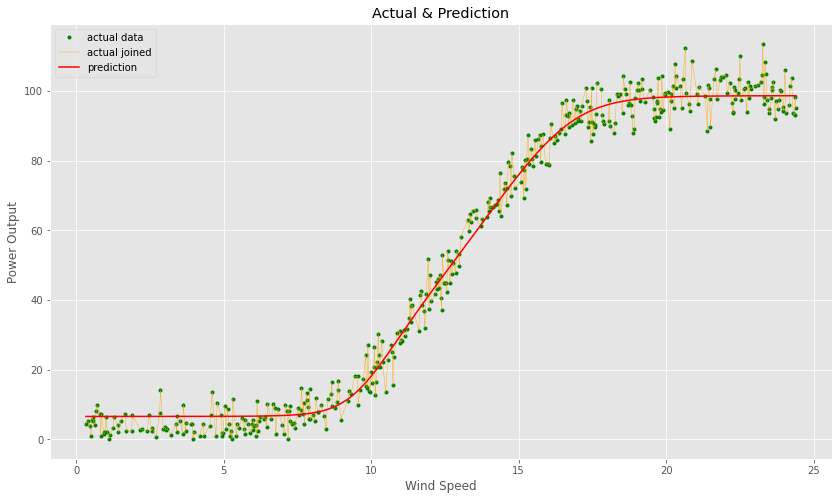

In [9]:
# Title
plt.title('Actual & Prediction')
# actual - green
plt.plot(train['speed'],train['power'], '.', color="green", label='actual data')
# join the dots
plt.plot(train['speed'],train['power'], color="orange", label='actual joined', linewidth = 0.4)
# prediction - red
plt.plot(train['speed'],model.predict(train['speed']), color="red", label='prediction')
# clean up output
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

In [10]:
# take a random sample for debugging
#model.predict([1.0, 9.0, 29.0, 70.0])

#### Save Model

In [11]:
# Save Model
model.save('model.h5')

***
# References
*Supplemented in README*

plots: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linewidth

Activation Functions: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

[1] ignore rows in np array: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

[2] remove rows with a 0: https://stackoverflow.com/questions/47819146/how-to-delete-a-row-based-on-a-condition-from-a-numpy-array


***

#### End